# Tuning the Best Models #

In this notebook, I will select the top three best models and tune their hyperparameters to get the best fit. Classification has turned out to give better results than regression, so I will be tuning the models that can tell me where an accident is likely to occur, not how many accidents are likely to occur there.

| Model | Vehicle | Accuracy |
| ---- | ---- | ---- |
| LogisticRegression | car | 0.645 | 
| LogisticRegression | bike | 0.474 | 
| KNeighborsClassifier | car | 0.844 | 
| KNeighborsClassifier | bike | 0.861 | 
| SVC | car | 0.834 | 
| SVC | bike | 0.788 | 
| LinearSVC | car | 0.681 | 
| LinearSVC | bike | 0.794 | 
| SGDClassifier | car | 0.719 | 
| SGDClassifier | bike | 0.762 | 
| DecisionTreeClassifier | car | 0.886 | 
| DecisionTreeClassifier | bike | 0.902 | 
| RandomForestClassifier | car | 0.885 | 
| RandomForestClassifier | bike | 0.908 | 
| BaggingClassifier | car | 0.895 | 
| BaggingClassifier | bike | 0.913 | 
| GradientBoostingClassifier | car | 0.885 | 
| GradientBoostingClassifier | bike | 0.895 | 
| AdaBoostClassifier | car | 0.859 | 
| AdaBoostClassifier | bike | 0.884 | 


So I will be tuning Decision Tree, Random Forest, Bagging, and Gradient Boosting to see which can give the best accuracy.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn import ensemble

In [2]:
# read in data set with categorical variables turned into dummy variablees
df = pd.read_csv('data/cleaned_data/md_dum.csv')

# create X and y values for modeling, this time using a mask to create 1 and 0 values for classification
car_c_y = df.car_acc_score.mask(df.car_acc_score > 0, 1)
car_X = df.drop(columns=['Unnamed: 0', 'car_acc_score', 'car_dens_score', 'bike_dens_score'])
bike_c_y = df.bike_acc_score.mask(df.bike_acc_score > 0, 1)
bike_X = df.drop(columns=['Unnamed: 0', 'bike_acc_score', 'car_dens_score', 'bike_dens_score'])

In [3]:
# train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

Search for the best Decision Tree parameters

In [11]:
params = {'criterion' : ['gini', 'entropy'],
         'splitter' : ['best', 'random'],
         'max_depth' : [10, 20, 50, 100],
         'min_samples_split': [2, 5, 10]}
dtc = tree.DecisionTreeClassifier(random_state=18)
cv = GridSearchCV(dtc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8881593740162792
Tuned Model Parameters: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 2, 'splitter': 'best'}


This is only slightly better than the original decision tree classifier. Trying again with some different parameters, but I may want to tune some other ensemble methods and see if they can be made better.

In [12]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=2, random_state=18)
params = {'max_depth': [60, 75, 100, 200, 300, 400, 500]}
cv = GridSearchCV(dtc, param_grid=params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8881593740162792
Tuned Model Parameters: {'max_depth': 75}


Tuning for bikes:

In [4]:
params = {'criterion' : ['gini', 'entropy'],
         'splitter' : ['best', 'random'],
         'max_depth' : [10, 20, 50, 100],
         'min_samples_split': [2, 5, 10]}
dtc = tree.DecisionTreeClassifier(random_state=18)
cv = GridSearchCV(dtc, params)
cv.fit(X_bike_c_train, y_bike_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_bike_c_test, y_bike_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9046633988397715
Tuned Model Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'splitter': 'best'}


This brings the accuracy up close to the level of the other ensemble methods, at least without performance tuning.

Now tuning Random Forest on cars. Even doing Randomized Search CV took a very long time.

In [14]:
rfc = ensemble.RandomForestClassifier(criterion='entropy', random_state=18)
params = {'n_estimators': [10, 100, 500, 1000],
         'max_depth' : [10, 50, 100, 200],
         'max_features' : ['sqrt', 'log2', None],
         'min_samples_split': [2, 5, 10]}
cv = RandomizedSearchCV(rfc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.895444529387957
Tuned Model Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': None, 'max_depth': 100}


I found some good parameters here but tried again a few  times to see if I could get better.

In [15]:
rfc = ensemble.RandomForestClassifier(criterion='entropy', min_samples_split=2, max_features=None, random_state=18)
params = {'n_estimators': [50, 100, 200, 300, 400, 500, 1000]}
cv = GridSearchCV(rfc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8964788415703557
Tuned Model Parameters: {'n_estimators': 400}


In [16]:
rfc = ensemble.RandomForestClassifier(criterion='entropy', 
                                      n_estimators=400,
                                      min_samples_split=2, 
                                      max_features=None, 
                                      random_state=18)
params = {'max_depth': [75, 100, 125, 150]}
cv = GridSearchCV(rfc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8965238116652426
Tuned Model Parameters: {'max_depth': 75}


In [17]:
rfc = ensemble.RandomForestClassifier(criterion='entropy', 
                                      n_estimators=400,
                                      min_samples_split=2, 
                                      random_state=18)
params = {'max_depth': [65, 75],
         'max_features':[None, 'sqrt', 'log2']}
cv = GridSearchCV(rfc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8964788415703557
Tuned Model Parameters: {'max_depth': 65, 'max_features': None}


It looks like the best I can do on predicting car accidents is 89.7% accuracy. Let's take a look at the confusion matrix and classification report.

[[11423  1060]
 [ 1242  8512]]


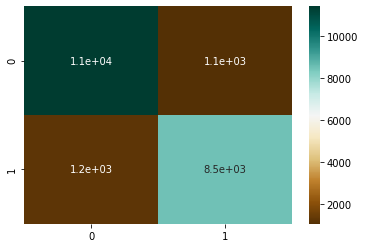

In [4]:
rfc = ensemble.RandomForestClassifier(criterion='entropy', 
                                      n_estimators=400,
                                      min_samples_split=2, 
                                      max_depth=65,
                                      max_features=None,
                                      random_state=18)
rfc.fit(X_car_c_train, y_car_c_train)
pred = rfc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [7]:
print(classification_report(y_car_c_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     12483
           1       0.89      0.87      0.88      9754

    accuracy                           0.90     22237
   macro avg       0.90      0.89      0.89     22237
weighted avg       0.90      0.90      0.90     22237



Now trying the tuned parameters on bike accidents, and it improves that score as well.

In [21]:
rfc = ensemble.RandomForestClassifier(criterion='entropy', 
                                      n_estimators=400,
                                      min_samples_split=2, 
                                      max_depth=75,
                                      max_features=None,
                                      random_state=18)
rfc.fit(X_bike_c_train, y_bike_c_train)

# Compute and print metrics
print("Accuracy: {}".format(rfc.score(X_bike_c_test, y_bike_c_test)))
pred = rfc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
print(c)

Accuracy: 0.918918918918919
[[17030   496]
 [ 1307  3404]]


Now tuning Bagging.

In [23]:
bgc = ensemble.BaggingClassifier(random_state=18)
params = {'n_estimators': [10, 100, 500, 1000],
         'max_features' : [0.25, 0.5, 0.75]}
cv = GridSearchCV(bgc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.895489499482844
Tuned Model Parameters: {'max_features': 0.75, 'n_estimators': 500}


In [25]:
bgc = ensemble.BaggingClassifier(random_state=18)
params = {'n_estimators': [500, 650, 800],
         'max_features' : [0.75, .9, 1.0]}
cv = GridSearchCV(bgc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.895489499482844
Tuned Model Parameters: {'max_features': 0.75, 'n_estimators': 500}


Trying tuned parameters on bikes. Performs very well.

In [4]:
bgc = ensemble.BaggingClassifier(random_state=18, max_features=0.75, n_estimators=500)
bgc.fit(X_bike_c_train, y_bike_c_train)

# Compute and print metrics
print("Accuracy: {}".format(bgc.score(X_bike_c_test, y_bike_c_test)))
pred = bgc.predict(X_bike_c_test)
c = confusion_matrix(y_bike_c_test, pred)
print(c)

Accuracy: 0.9217520348967936
[[17029   497]
 [ 1243  3468]]


Tuning Gradient Boosting.

In [26]:
gbc = ensemble.GradientBoostingClassifier(random_state=18)
params = {'n_estimators': [10, 100, 500, 1000],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
          'max_depth' : [2, 3, 5, 10],
          'max_features': ['sqrt', 'log2', None],
          'min_samples_split': [2, 5, 10, 20]}
cv = RandomizedSearchCV(gbc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8934208751180465
Tuned Model Parameters: {'n_estimators': 500, 'min_samples_split': 20, 'max_features': None, 'max_depth': 10, 'learning_rate': 0.5}


In [4]:
gbc = ensemble.GradientBoostingClassifier(random_state=18, n_estimators=500, max_features=None)
params = {'learning_rate': [0.3, 0.5, 0.7, 0.9],
          'max_depth' : [7, 10, 15, 20],
          'min_samples_split': [5, 20, 30]}
cv = RandomizedSearchCV(gbc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8949498583442012
Tuned Model Parameters: {'min_samples_split': 5, 'max_depth': 15, 'learning_rate': 0.3}


Trying tuned parameters on bike accident data.

In [6]:
gbc = ensemble.GradientBoostingClassifier(random_state=18, n_estimators=500, max_features=None,
                                         min_samples_split=5, max_depth=15, learning_rate=0.3)
gbc.fit(X_bike_c_train, y_bike_c_train)
print("Accuracy: {}".format(cv.score(X_bike_c_test, y_bike_c_test)))

Accuracy: 0.7627827494716014


That is not good, so bike accident data may need different hyperparameters for this model.

In [7]:
gbc = ensemble.GradientBoostingClassifier(random_state=18)
params = {'n_estimators': [10, 100, 500, 1000],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
          'max_depth' : [2, 3, 5, 10, 15, 20],
          'max_features': ['sqrt', 'log2', None],
          'min_samples_split': [2, 5, 10, 20]}
cv = RandomizedSearchCV(gbc, params)
cv.fit(X_bike_c_train, y_bike_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_bike_c_test, y_bike_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9128479561091873
Tuned Model Parameters: {'n_estimators': 100, 'min_samples_split': 20, 'max_features': None, 'max_depth': 10, 'learning_rate': 0.1}


Yes, that is much better. 

Since accidents may happen in the future, it wouldn't make sense to have perfect accuracy. Let's look at the confusion matrix and classification report for the best model.

[[17173   353]
 [ 1586  3125]]


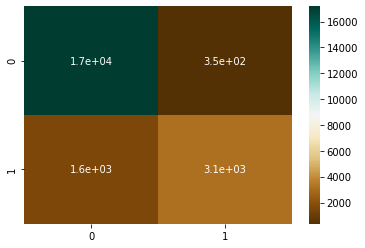

In [8]:
gbc = ensemble.GradientBoostingClassifier(random_state=18, 
                                          n_estimators=100, 
                                          min_samples_split=20,
                                          max_features=None, 
                                          max_depth=10, 
                                          learning_rate=0.1)
gbc.fit(X_bike_c_train, y_bike_c_train)
pred = gbc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [9]:
print(classification_report(y_bike_c_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     17526
           1       0.90      0.66      0.76      4711

    accuracy                           0.91     22237
   macro avg       0.91      0.82      0.85     22237
weighted avg       0.91      0.91      0.91     22237



Next I will use the best-performing models on a subset of features, to see if I get better results or at least faster-performing models. [Go>>](Feature%20Selection.ipynb)